# Predicting Mortgage Backed Securities Prepayment Risk Prediction

# **Third Task : Modelling.**

*  Confusion matrix
*  Precision and Recall
*  Area under the ROC Curve (AUC)
*  Accuracy & F1 score

Higher the area under the ROC curve, the better the classifier.
Min 0.5 AUC for tuned models. Aim for AUC > 0.5.
Overall performance of the model (validation checks)









## The LoanExport data consists of 291451 rows and 28 columns. The columns of the dataset are explained below:

### 0   CreditScore :                     Credit score of the client
###  1   FirstPaymentDate  :         First payment date of the customer
###  2   FirstTimeHomebuyer :     If the customer is first time home buyer
###  3   MaturityDate   :                 Maturity date of the customer
###  4   MSA  :                                Mortgage security amount
###  5   MIP   :                                Mortgage insurance percentage  
###  6   Units  :            Number of units  
###  7   Occupancy  :        Occupancy status at the time the loan
###  8   OCLTV  :            Original Combined Loan-to-Value
###  9   DTI  :              Debt to income ratio
###  10  OrigUPB  :          Original unpaid principal balance
###  11  LTV   :          Loan-to-Value
###  12  OrigInterestRate :   Original interest rate
###  13  Channel  :           The origination channel used by the party
###  14  PPM  :               Prepayment penalty mortgage
###  15  ProductType  :       Type of product
###  16  PropertyState  :     State in which the property is located
###  17  PropertyType :       Property type
###  18  PostalCode  :        Postal code of the property
###  19  LoanSeqNum  :        Loan number
###  20  LoanPurpose   :      Purpose of the loan
###  21  OrigLoanTerm  :      Original term of the loan
###  22  NumBorrowers :       Number of borrowers
###  23  SellerName  :        Name of seller
###  24  ServicerName  :      Name of the service used
###  25  EverDelinquent  :    If the loan was ever delinquent  
###  26  MonthsDelinquent  :  Months of delinquent  
###  27  MonthsInRepayment :  Months in repayment

## Importing Data & Needed Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import statsmodels.api as sm
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
import matplotlib
warnings.filterwarnings("always")

%matplotlib inline

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# First Look at the data


In [ ]:
data = pd.read_csv('LoanExport.csv')
data.head(20)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-63-674adbca6759>:1: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('LoanExport.csv')


,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,...,PostalCode,LoanSeqNum,LoanPurpose,OrigLoanTerm,NumBorrowers,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment
0,0,199902,N,202901,16974,25,1,O,89,27,...,60400,F199Q1268030,P,360,2,FL,WASHINGTONMUTUALBANK,0,0,52
1,0,199902,N,202901,19740,0,1,O,73,17,...,80200,F199Q1015092,N,360,1,FT,CHASEHOMEFINANCELLC,0,0,144
2,0,199902,N,202901,29940,0,1,O,75,16,...,66000,F199Q1266886,N,360,2,FL,WASHINGTONMUTUALBANK,0,0,67
3,0,199902,N,202901,31084,0,1,O,76,14,...,90700,F199Q1178167,N,360,2,GM,GMACMTGECORP,0,0,35
4,0,199902,N,202901,35644,0,1,O,78,18,...,7600,F199Q1178517,N,360,2,GM,GMACMTGECORP,0,0,54
5,0,199902,N,202901,X,25,1,O,89,40,...,80400,F199Q1224802,N,360,2,Ot,Other servicers,0,0,42
6,0,199902,N,202901,X,25,1,O,90,21,...,53100,F199Q1291436,P,360,1,RE,Other servicers,0,0,44
7,0,199902,X,202901,36740,0,1,O,72,20,...,32800,F199Q1001824,N,360,1,NO,WELLSFARGOBANKNA,1,3,145
8,0,199902,Y,202710,25540,30,1,O,95,38,...,6400,F199Q1079744,P,345,1,Ot,Other servicers,0,0,64
9,0,199902,Y,202901,48620,30,1,O,95,27,...,67000,F199Q1196318,P,360,1,Ot,WELLSFARGOBANKNA,1,104,212


## There is a chance of overfitting of the data, so we smote function to balance the data

In [ ]:

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

x = data.drop("EverDelinquent", axis=1)
y = data["EverDelinquent"]

bestfeatures = SelectKBest(score_func=chi2, k=14)
fit = bestfeatures.fit(x, y)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Specs', 'Score']
featureScores.sort_values(by='Score', ascending=False)

,Specs,Score
10,MonthsInRepayment,221960.459335
13,RepaymentRange,8336.552337
0,CreditScore,5465.087058
2,MIP,1089.217968
11,CreditScoreRange,685.609158
5,LTV,183.958058
3,OCLTV,179.613370
4,DTI,123.944907
9,NumBorrowers,107.264664
7,PPM,21.141453


## We will use Smote to balance the data.

In [ ]:
'''from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
pd.DataFrame(scaler.fit_transform(x_smote), columns=x.columns)
'''

'from sklearn.preprocessing import StandardScaler\nscaler=StandardScaler()\npd.DataFrame(scaler.fit_transform(x_smote), columns=x.columns)\n'

In [ ]:
y.value_counts()

0.0    66983
1.0    24950
Name: EverDelinquent, dtype: int64

In [ ]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek(random_state=42)
x_smote, y_smote = smt.fit_resample(x, y)

In [ ]:
#Now Concat the x_smote and y_smote and make balance dataframe
df_smote_over = pd.concat([pd.DataFrame(x_smote,columns=['CreditScore','FirstTimeHomebuyer','MIP','OCLTV','DTI','LTV','OrigInterestRate','PPM','OrigLoanTerm','NumBorrowers','MonthsInRepayment','CreditScoreRange','LTVRange','RepaymentRange']), pd.DataFrame(y_smote, columns=['EverDelinquent'])], axis=1)

In [ ]:
for x in df_smote_over.columns:
  if(x=="OrigInterestRate"):
    continue
  df_smote_over[x]=df_smote_over[x].astype(int)


In [ ]:
df_numeric = df_smote_over.select_dtypes(include=[np.number])
print(np.mean(df_numeric))
print(np.std(df_numeric))


CreditScore           669.403408
FirstTimeHomebuyer      0.118397
MIP                    13.282464
OCLTV                  81.738413
DTI                    33.037637
LTV                    81.720507
OrigInterestRate        6.972893
PPM                     0.013127
OrigLoanTerm          359.899745
NumBorrowers            1.550575
MonthsInRepayment      65.387011
CreditScoreRange        1.914429
LTVRange                2.963432
RepaymentRange          0.856260
EverDelinquent          0.500000
dtype: float64
CreditScore           37.819691
FirstTimeHomebuyer     0.323078
MIP                   13.568622
OCLTV                 12.977994
DTI                   10.944604
LTV                   12.973843
OrigInterestRate       0.338955
PPM                    0.113820
OrigLoanTerm           1.707753
NumBorrowers           0.497436
MonthsInRepayment     49.806860
CreditScoreRange       0.725978
LTVRange               0.201317
RepaymentRange         1.104558
EverDelinquent         0.500000
dtype: flo

In [ ]:
df=df_smote_over
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127216 entries, 0 to 127215
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   CreditScore         127216 non-null  int64  
 1   FirstTimeHomebuyer  127216 non-null  int64  
 2   MIP                 127216 non-null  int64  
 3   OCLTV               127216 non-null  int64  
 4   DTI                 127216 non-null  int64  
 5   LTV                 127216 non-null  int64  
 6   OrigInterestRate    127216 non-null  float64
 7   PPM                 127216 non-null  int64  
 8   OrigLoanTerm        127216 non-null  int64  
 9   NumBorrowers        127216 non-null  int64  
 10  MonthsInRepayment   127216 non-null  int64  
 11  CreditScoreRange    127216 non-null  int64  
 12  LTVRange            127216 non-null  int64  
 13  RepaymentRange      127216 non-null  int64  
 14  EverDelinquent      127216 non-null  int64  
dtypes: float64(1), int64(14)
memory us

## We will be splitting the data in to test and train datas. We will find accuracy of components

In [ ]:
x = df.drop("EverDelinquent", axis=1)
y = df["EverDelinquent"]

In [ ]:
'''
from sklearn.decomposition import PCA
pca = PCA(n_components=14, svd_solver="full")
x = pd.DataFrame(pca.fit_transform(x), columns=x.columns)
x.head()
'''

'\nfrom sklearn.decomposition import PCA\npca = PCA(n_components=14, svd_solver="full")\nx = pd.DataFrame(pca.fit_transform(x), columns=x.columns)\nx.head()\n'

  ## Features

In [ ]:
# Select the most important features

In [ ]:
import category_encoders as ce
from sklearn.feature_selection import SelectKBest , SelectPercentile , mutual_info_classif

In [ ]:
from sklearn.feature_selection import mutual_info_classif as MIC
mi_score = MIC(x,y)
print(mi_score)

[0.03543553 0.00648651 0.04825823 0.00634499 0.00396307 0.06299152
 0.00629574 0.03394228 0.04622042 0.00190383 0.00661229 0.01033386
 0.00074777 0.01344034 0.02054443 0.00820801 0.01053787 0.01821818
 0.0480611 ]


In [ ]:
from sklearn.feature_selection import chi2
best_features=SelectKBest(score_func=chi2,k=10)
fit=best_features.fit(x,y)
df_scores= pd.DataFrame(fit.scores_)
df_col=pd.DataFrame(x.columns)
features_score =pd.concat([df_col,df_scores], axis=1)
features_score.columns=['feature','score']
features_score.sort_values(by=['score'],ascending=False)

,feature,score
0,CreditScore,82313.364214
1,MIP,18965.503893
17,CreditRange_poor,10713.083319
4,DTI,6351.661197
14,CreditRange_excellent,5646.301434
6,LTV,4025.526627
3,OCLTV,4004.643940
15,CreditRange_fair,2039.242517
16,CreditRange_good,1383.901767
13,LTVRange,297.554751


In [ ]:
selector=SelectKBest(mutual_info_classif,k=15)
x_selected=selector.fit_transform(x,y)
cols=selector.get_support(indices=True)
selected_features = x.iloc[:,cols].columns.tolist()
selected_features

['CreditScore',
 'MIP',
 'Units',
 'OCLTV',
 'OrigUPB',
 'LTV',
 'OrigInterestRate',
 'OrigLoanTerm',
 'LoanPurpose_P',
 'LTVRange',
 'CreditRange_excellent',
 'CreditRange_fair',
 'CreditRange_good',
 'CreditRange_poor',
 'RepayRange_high']

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
model=ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_)

[0.38252091 0.01805842 0.         0.05438971 0.39739373 0.
 0.05382889 0.         0.00437438 0.00090221 0.00087156 0.00100302
 0.00262827 0.00364152 0.01703974 0.0119505  0.01114297 0.04025416
 0.        ]


In [ ]:
#view feature importance

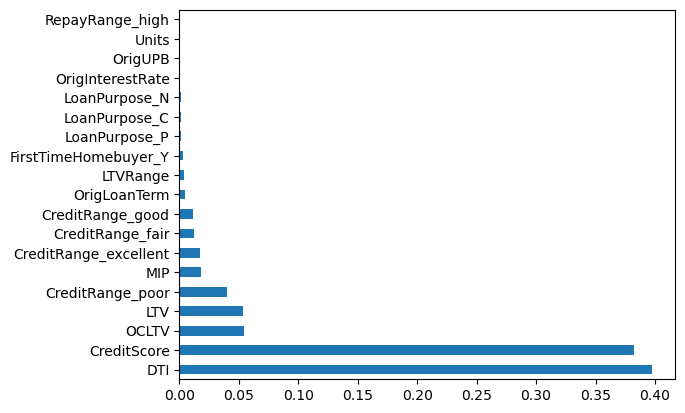

In [ ]:
feat_imp=pd.Series(model.feature_importances_,index=x.columns)
feat_imp.nlargest(20).plot(kind='barh')
plt.show()

In [ ]:
from sklearn.feature_selection import mutual_info_regression
discrete_features = x.dtypes == int
def make_mi_scores(X, y):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(x, y)
mi_scores[::]

OrigUPB                  0.047547
CreditScore              0.035611
CreditRange_poor         0.018783
CreditRange_excellent    0.017687
OrigLoanTerm             0.007728
CreditRange_good         0.006610
LTV                      0.006538
OCLTV                    0.006438
MIP                      0.005563
CreditRange_fair         0.005496
LTVRange                 0.003246
DTI                      0.002040
OrigInterestRate         0.001883
RepayRange_high          0.000960
LoanPurpose_C            0.000485
LoanPurpose_N            0.000065
FirstTimeHomebuyer_Y     0.000000
LoanPurpose_P            0.000000
Units                    0.000000
Name: MI Scores, dtype: float64

In [ ]:
raw_data.columns

Index(['CreditScore', 'MIP', 'Units', 'OCLTV', 'DTI', 'OrigUPB', 'LTV',
       'OrigInterestRate', 'OrigLoanTerm', 'EverDelinquent', 'LoanPurpose_C',
       'LoanPurpose_N', 'LoanPurpose_P', 'FirstTimeHomebuyer_Y', 'LTVRange',
       'CreditRange_excellent', 'CreditRange_fair', 'CreditRange_good',
       'CreditRange_poor', 'RepayRange_high'],
      dtype='object')

In [ ]:
#Select best features after PCA

In [ ]:
import pandas as pd
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression


# Define the number of top features to select
N = 11

# Select top N features based on mutual information
selector = SelectKBest(score_func=mutual_info_regression, k=N)
X_selected = selector.fit_transform(x, y)

# Get the indices of the selected features
selected_feature_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_features = x.columns[selected_feature_indices].tolist()



In [ ]:
df_selected = pd.DataFrame(X_selected)

df_selected.dtypes

0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
dtype: object

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x= scaler.fit_transform(x)


In [ ]:
pca=PCA(n_components=6)
pca.fit(x)
features=pca.transform(x)

## Modelling

In [ ]:
from sklearn.model_selection import train_test_split


# separate features and labels
import pandas as pd
df_selected = pd.DataFrame(X_selected)
# features = df_selected

df_labels = pd.DataFrame(y)
labels = df_labels["EverDelinquent"]


# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
    test_size=0.25, random_state= 8)


print("X_train shape: {}".format(X_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_train shape: {}".format(y_train.shape))
print("y_test shape: {}".format(y_test.shape))
print("X_val shape: {}".format(y_train.shape))
print("y val shape: {}".format(y_test.shape))


X_train shape: (173587, 6)
X_test shape: (57863, 6)
y_train shape: (173587,)
y_test shape: (57863,)
X_val shape: (173587,)
y val shape: (57863,)


In [ ]:
features.shape

(289313, 6)

In [ ]:
labels.shape

(289313,)

In [ ]:
labels.value_counts()

0    231680
1     57633
Name: EverDelinquent, dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE
oversampled = SMOTE(random_state=0)
X_train_smote, y_train_smote = oversampled.fit_resample(X_train, y_train)

In [ ]:
y_train_smote.value_counts()

0    139060
1    139060
Name: EverDelinquent, dtype: int64

## Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score



# Train the random forest classifier
rf = RandomForestClassifier(n_estimators=2)
rf.fit(X_train_smote, y_train_smote)

# Make predictions on the test set
y_pred = rf.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7123550455385999


In [ ]:
#Testing Accuracy
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred_test = rf.predict(X_test)
y_pred_test[0:5]


testing_accuracy = accuracy_score(y_test,y_pred_test)*100
print('Testing data accuracy is:', testing_accuracy)
print()

clf_report = classification_report(y_test,y_pred_test)
print('Classification report:\n', clf_report)
print()

confusion_matrix(y_test,y_pred_test)

Testing data accuracy is: 71.23550455385998

Classification report:
               precision    recall  f1-score   support

           0       0.82      0.83      0.82     46273
           1       0.27      0.26      0.26     11590

    accuracy                           0.71     57863
   macro avg       0.54      0.54      0.54     57863
weighted avg       0.71      0.71      0.71     57863




array([[38238,  8035],
       [ 8609,  2981]])

In [ ]:
#Training Accuracy

y_pred_train = rf.predict(X_train)
y_pred_train


training_accuracy = accuracy_score(y_train,y_pred_train)*100
print('training data accuracy is:', training_accuracy)
print()

clf_report = classification_report(y_train,y_pred_train)
print('Classification report:\n', clf_report)
print()

confusion_matrix(y_train,y_pred_train)

training data accuracy is: 90.37312701988051

Classification report:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94    139060
           1       0.79      0.71      0.75     34527

    accuracy                           0.90    173587
   macro avg       0.86      0.83      0.84    173587
weighted avg       0.90      0.90      0.90    173587




array([[132452,   6608],
       [ 10103,  24424]])

In [ ]:
accuracy_score(y_test,y_pred)

0.7123550455385999

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred)

0.5417805546394604

## Accuracy is around 71%

##  Hyperparametric tuning on Random Forest Classifier model

In [ ]:

# Define the hyperparameters grid
param_grid = {
               'max_depth': [9, 53, 101], # this is the longest path between the root node and the leaf node. It is possible to limit the depth of every tree in the random forest is goint to grow
                'max_features': [1, 3], # It shows the number of features to consider when the model is looking for the best split.
                'n_estimators': [100, 300], # it defines the number of trees in the forest.
               'criterion' :['gini', 'entropy'] # Checks the quality of the split.
}

# Initialize the Random Forest classifier
rfc = RandomForestClassifier()

# Perform grid search with cross-validation
grid_search = GridSearchCV(rfc, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

# Get the best model and its predictions
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)

# Calculate evaluation metrics
hrf_accuracy = accuracy_score(y_test, y_pred)
hrf=grid_search.best_score_
# Print the results
print("Best hyperparameters:", grid_search.best_params_)
print('Best model:', best_model)
print('Grid search best score:',grid_search.best_score_)
print('Accuracy score:', hrf_accuracy)
print('Roc_auc:', roc_auc_score(y_test, y_pred))
print('R-squared score:', r2_score(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))



Best hyperparameters: {'criterion': 'entropy', 'max_depth': 101, 'max_features': 3, 'n_estimators': 300}
Best model: RandomForestClassifier(criterion='entropy', max_depth=101, max_features=3,
                       n_estimators=300)
Grid search best score: 0.8652326186956752
Accuracy score: 0.8753564513289914
Roc_auc: 0.8753587120529951
R-squared score: 0.5014257163338393
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.88      0.88     28393
           1       0.88      0.87      0.87     28417

    accuracy                           0.88     56810
   macro avg       0.88      0.88      0.88     56810
weighted avg       0.88      0.88      0.88     56810

Confusion Matrix:
 [[25006  3387]
 [ 3694 24723]]


## Important features of the dataset.

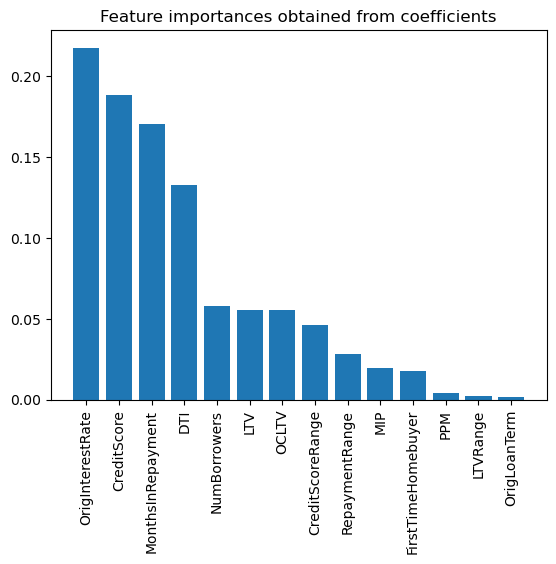

In [ ]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

# predict
y_pred = rfc.predict(x_test)
importances = pd.DataFrame(data={
    'Name': x_train.columns,
    'Importance': rfc.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)
plt.bar(x=importances['Name'], height=importances['Importance'])
plt.title('Feature importances obtained from coefficients')
plt.xticks(rotation='vertical')
plt.show()


## Plot Model Results

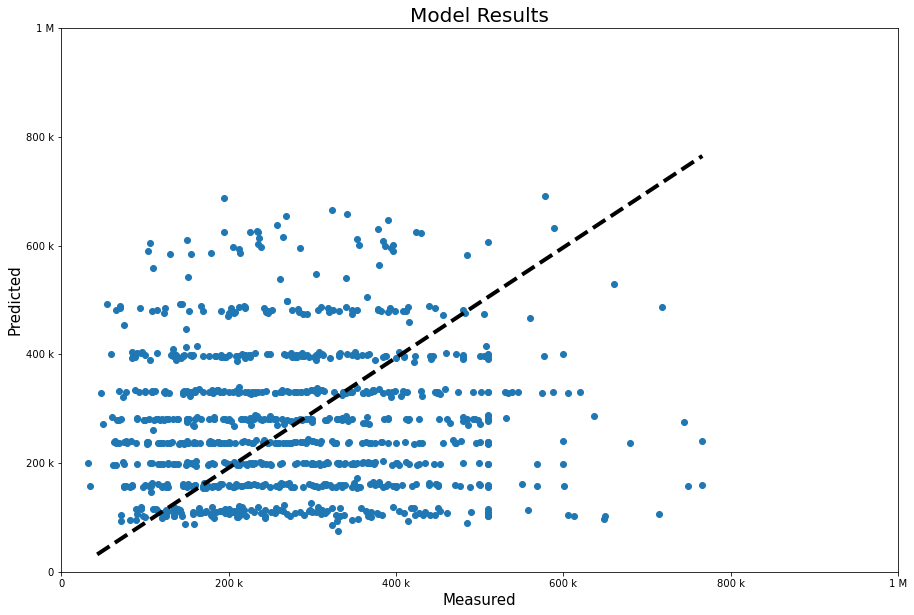

In [ ]:
#plot with line
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15,10))
ax.scatter(y_test.to_pandas().sample(1000), preds.to_pandas().sample(1000))
ax.plot([y_test.to_pandas().sample(1000).min(),y_test.to_pandas().sample(1000).max()], [y_test.to_pandas().sample(1000).min(), y_test.to_pandas().sample(1000).max()], 'k--', lw=4)
plt.title('Model Results', size=20)
ax.set_xlabel('Measured', size=15)
ax.set_ylabel('Predicted', size=15)

# set x & y limits
ax.set(xlim = (0,1000000))
ax.set(ylim = (0,1000000))
# fix limits format
ax.xaxis.set_major_formatter(ticker.EngFormatter())
ax.yaxis.set_major_formatter(ticker.EngFormatter())
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred_gu))

0.8661962086619621


In [ ]:
from sklearn.ensemble import RandomForestClassifier

i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    model = RandomForestClassifier(random_state=1, max_depth=10)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    print('accuracy_score',score)
    i+=1
    pred_test = model.predict(test)
    pred=model.predict_proba(xvl)[:,1]



1 of kfold 5
accuracy_score 0.8292682926829268

2 of kfold 5
accuracy_score 0.8211382113821138

3 of kfold 5
accuracy_score 0.7967479674796748

4 of kfold 5
accuracy_score 0.8130081300813008

5 of kfold 5
accuracy_score 0.7786885245901639


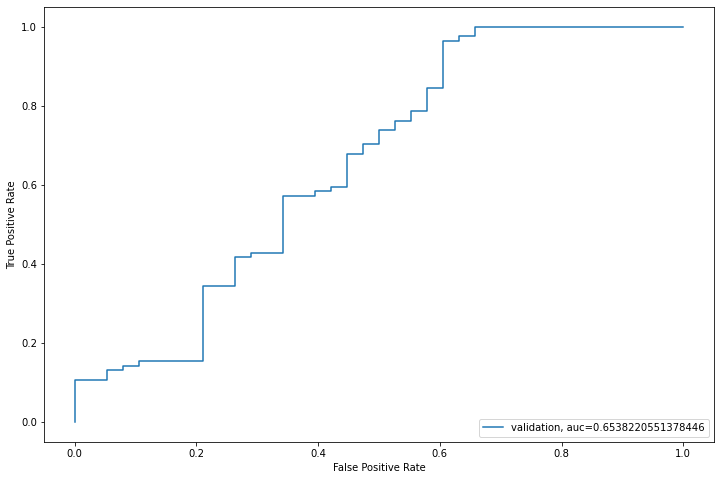

In [ ]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(yvl,  pred)
auc = metrics.roc_auc_score(yvl, pred)
plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label="validation, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

#other

## Logistic Regression model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,r2_score, precision_score, recall_score, f1_score, roc_auc_score,classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Instantiate the Logistic Regression model
model = LogisticRegression()

# Fit the model on the training data
model.fit(x_train, y_train)

# Predict on the testing data
y_pred = model.predict(x_test)
lr_accuracy=accuracy_score(y_test, y_pred)

# Perform cross-validation
lr_cross_val_scores = cross_val_score(model, x, y, cv=5,scoring='roc_auc')  # cv=5 for 5-fold cross-validation

print("Cross-validation scores:", lr_cross_val_scores)
print("Average cross-validation score:", lr_cross_val_scores.mean())
print("Logistic regression Accuracy score:", accuracy_score(y_test, y_pred))
print("ROC AUC score:", roc_auc_score(y_test, y_pred))
print("R-squared score:", r2_score(y_test, y_pred))

print('Classification Report:\n',classification_report(y_test,y_pred))

print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred))


Cross-validation scores: [0.47689155 0.66607291 0.85275426 0.89061701 0.86620507]
Average cross-validation score: 0.7505081584552278
Logistic regression Accuracy score: 0.7200668896321071
ROC AUC score: 0.7200725285044332
R-squared score: -0.11973264131379113
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.73      0.72     28393
           1       0.73      0.71      0.72     28417

    accuracy                           0.72     56810
   macro avg       0.72      0.72      0.72     56810
weighted avg       0.72      0.72      0.72     56810

Confusion Matrix:
 [[20824  7569]
 [ 8334 20083]]


##  Hyperparametric tuning on Logistic Regression model

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters grid
param_grid = {
    'penalty' : ['l1','l2'], # Also known as regularization. It specifies the norm of the penalty.
                'C'       : [10.0, 25.0, 50.0], # it shows the Inverse of regularization strength.
                'solver'  : ['newton-cg', 'lbfgs', 'liblinear']        # Whether to calculate the intercept for this model
}

# Initialize the Logistic Regression model
lr = LogisticRegression()

# Perform grid search with cross-validation
grid_search = GridSearchCV(lr, param_grid, cv=5, scoring='recall')
grid_search.fit(x_train, y_train)

# Get the best model and its predictions
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)

# Calculate evaluation metrics
hlr_accuracy = accuracy_score(y_test, y_pred)
hlr=grid_search.best_score_

# Print the results
print("Best hyperparameters:", grid_search.best_params_)
print('Best model:', best_model)
print('Grid search best score:',grid_search.best_score_)
print('Accuracy score:', hlr_accuracy)
print('Roc_auc:', roc_auc_score(y_test, y_pred))
print('R-squared score:', r2_score(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))


Best hyperparameters: {'C': 50.0, 'penalty': 'l2', 'solver': 'liblinear'}
Best model: LogisticRegression(C=50.0, solver='liblinear')
Grid search best score: 0.7073217726620846
Accuracy score: 0.7210526315789474
Roc_auc: 0.7210579434263567
R-squared score: -0.11578967282271568
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.73      0.72     28393
           1       0.73      0.71      0.72     28417

    accuracy                           0.72     56810
   macro avg       0.72      0.72      0.72     56810
weighted avg       0.72      0.72      0.72     56810

Confusion Matrix:
 [[20830  7563]
 [ 8284 20133]]
